Submit your code in the form of a pre-run Jupyter Notebook (.ipynb) with your name in the file name. Upload it to Brightspace, by midnight on Wed Feb 1. When working with downloaded data on your local machine, clearly label the variables that represent the paths to the csv files so that Max can replace it with the path to the data on his local machine. 


1. Temperature anomaly plots 

Download the following global temperature anomaly datasets in CSV format from https://data.giss.nasa.gov/gistemp/:

Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies:
 “Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month”

AIRS v6 and AIRS v7 Temperature Anomalies:
“Global-mean monthly, seasonal, and annual means, 2002-present, updated through most recent month” 

AIRS stands for Atmospheric Infrared Sounder and is a satellite based measure. Use the AIRS v6 data.

Note from NOAA on why global averages are given as anomalies and not absolute temperatures: 
Using reference values computed on smaller (more local) scales over the same time period establishes a baseline from which anomalies are calculated. This effectively normalizes the data so they can be compared and combined to more accurately represent temperature patterns with respect to what is normal for different places within a region.
For these reasons, large-area summaries incorporate anomalies, not the temperature itself. Anomalies more accurately describe climate variability over larger areas than absolute temperatures do, and they give a frame of reference that allows more meaningful comparisons between locations and more accurate calculations of temperature trends.

Plot the annual (J-D) anomalies from these two datasets together on the same (labeled) x and y axes. Use information from the NASA website to explain why the AIRS values are lower than the land and sea surface data. 



Before starting, it is worth mentioning that in order to make this notebook work, I had to manually clean the data tables because the format wasn't working properly when loading it. But the data itself was not changed, I just made it easier to be imported

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv("GLBdata1.csv")
df2 = pd.read_csv("GLBdata2.csv")

In [2]:
df2.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [3]:
df2['Year'] = df2['Year'].astype(float)
df2['Atmospheric Infrared Sounder (v6) temps'] = df2['J-D'].astype(float)
df['Land-Surface Air and Sea-Surface Water temps'] = df['J-D']

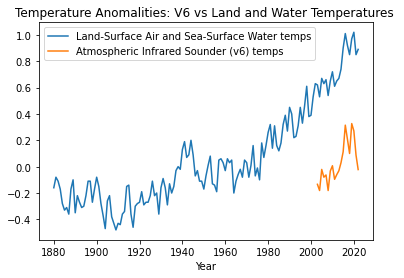

In [4]:
ax = df.plot(x='Year', y='Land-Surface Air and Sea-Surface Water temps')
df2.plot(ax=ax, x='Year', y='Atmospheric Infrared Sounder (v6) temps')

plt.title('Temperature Anomalities: V6 vs Land and Water Temperatures ')
plt.show()

The reason why...

As stablished in the following paper: https://www.nature.com/articles/s41598-020-64167-1, there are statistically significant discrepancies between SST and MAT anomalies. Thus, with such a different measurement (AIRS) we will expect strong discrepancies with SST and MAT.

But to build more on the reasons why, lets start from the basics. AIRS stands for Atmospheric Infrared Sounder on NASA's Aqua satellite instrument suite measures infrared radiation from the atmosphere and turns these measurements into the quantities of temperature, humidity and cloudiness. Thus, it is an algorithm that measures these quantities based on retrieval forms, which is sensible to measurement errors as well. But the key is to understand why the discrepancy is so wide, we will have to think about which signals is the satellite picking: a satellite is picking up these signals from the outer layer of earth, and there is much difference in temperatures depending on which layer we are talking about. And analyzing from a satellite, temperatures from the mesosphere will shift these results significantly. Which is something that is mentioned on the NASA website.

Notwithstanding, the reason why it still follows the earth and water surface trend, is because we are measuring anomalities and not absolute values: anomalies more accurately describe climate variability over larger areas than absolute temperatures do, and they give a frame of reference that allows more meaningful comparisons between locations and more accurate calculations of temperature trends.

Moreover, it is also worth noting the energy emitted by the Earth's surface is less than the total outgoing energy due to the fact that the atmosphere (clouds, etc) absorb some of the energy, so this might also be a contrubutional factor, that is accounted as a source of measurement error.

2. Climate stripes

“Climate stripes” or “warming stripes” have become an international artistic sign of climate concern: https://en.wikipedia.org/wiki/Warming_stripes . 

Use the land and sea surface data (first dataset from Q1) to replicate this visualization with temperature anomalies. Your results should use the same blue-red color scheme and the figure width:height ratio should be no greater than 5:1 so that the stripe colors are clearly visible. Don't include ticks or tick labels on the axes; the plot should be just the stripes. 

In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap


def climate_stripes(df, col):

    #drop null, clean the data
    data = df.loc[:, col].dropna()
    
    #reference year
    reference = data.reset_index().loc[len(data)//2][col].mean()
    
    #to control colors based on standard deviations of the data
    clim = 2 * data.std()
    
    #first year and last year
    first = data.index[0]
    last = data.index[-1]
    
    #this I got it online (specific colors)
    cmap = ListedColormap([
            '#08306b', '#08519c', '#2171b5', '#4292c6',
            '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
            '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
            '#ef3b2c', '#cb181d', '#a50f15', '#67000d',])

    #5:1 ratio as asked
    fig = plt.figure(figsize=(5, 1))

    #we set the axes
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()

    # create a collection with a rectangle for each row
    col = PatchCollection([
        Rectangle((y, 0), 1, 1)
        for y in range(first, last + 1)
    ])

    # set data, colormap and color limits that we configured
    col.set_array(data)
    col.set_cmap(cmap)
    col.set_clim(reference - clim, reference + clim)
    ax.add_collection(col)
    ax.set_ylim(0, 1)
    ax.set_xlim(first, last +1)

    return col

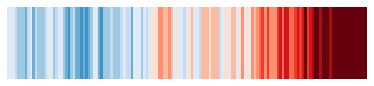

In [41]:
climate_stripes(df, 'J-D')

In [13]:
#This is another cool way to do it, so that it is easier

#import this package in order to use the tool extension for heat_stripes

#!pip install pandex

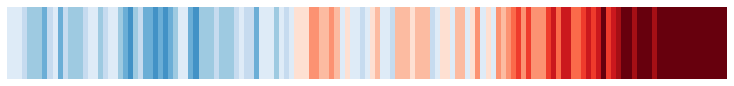

In [15]:
import pandex as pd
pd.ext.import_extension('github:connectedblue/pdext_collection -> heat_stripes')

fig = df.ext.heat_stripes('J-D')

3. Carbon per year 

Get the “Globally averaged marine surface annual mean data” (CSV) here: https://gml.noaa.gov/ccgg/trends/gl_data.html
and use it to write a function that returns the average amount of carbon (ppm) in the atmosphere for a given year (averaged over months). 

Use your function to find the average for the year you were born and for the year I was born (1989). Which one is higher? 


In [34]:
df3 = pd.read_csv("co2_annmean_gl.csv")

def func(df3, yeartemp):
    result = df3.loc[yeartemp, "mean"]
    return print("The average amount of carbon in the atmosphere in year", yeartemp, "was", result, "ppm")

#necessary for the function to identify the year
df3.index = df3['year']

In [35]:
df3 #as we can see, it brings the yearly averages per year, and that is why we did the function so straightforward

,year,mean,unc
year,,,
1979,1979,336.85,0.10
1980,1980,338.91,0.07
1981,1981,340.11,0.08
1982,1982,340.86,0.03
1983,1983,342.53,0.05
1984,1984,344.07,0.07
1985,1985,345.54,0.07
1986,1986,346.97,0.07
1987,1987,348.68,0.09


In [36]:
func(df3,2001)

The average amount of carbon in the atmosphere in year 2001 was 370.57 ppm


In [37]:
func(df3,1989)

The average amount of carbon in the atmosphere in year 1989 was 352.79 ppm


Clearly, the average amount of carbon in the atmosphere has been increasing through the years, and this quantity was much higher when I was born (in 2001) than it was in 1989. With a relative 17.779 increase in the scope of a 12 year gap (between 1989 and 2001). That is not normal

In [39]:
370.57 - 352.79

17.779999999999973

In [44]:
#Moreover, we can also set up the function like this

#hardcoding the dataset, but I did not think it was good practice

def func(yeartemp):
    result = df3.loc[yeartemp, "mean"]
    return print("The average amount of carbon in the atmosphere in year", yeartemp, "was", result, "ppm")

In [43]:
func(1989)

The average amount of carbon in the atmosphere in year 1989 was 352.79 ppm
